In [229]:
import math
import matplotlib.pyplot as plt
import scipy.constants as cns
import numpy as np
from scipy import integrate
%matplotlib inline

In [2]:
# Lecture 10 Problem

In [4]:
# Plot the number of ionization electrons expected in a liquid argon and liquid xenon experiment as a 
# function of the nuclear recoil energy (ER)

# Q = Er(L(Er)) / W

In [30]:
E_r = np.arange(1, 10, 0.001) # keV

In [31]:
# Argon
Z = 18
A = 40
W = 0.0236   # KeV

# Solving for L(Er)
eps = 11.5 * E_r * Z**(-7/3)
k = 0.133 * Z**(2/3) * A**(-1/2)
g_eps = 3 * eps**(0.15) + 0.7 * eps**(0.6) + eps

L_Er = (k * g_eps) / (1 + (k * g_eps))

# Solving for Q

Q = (E_r * L_Er) / W

In [32]:
# Xenon
Z_X = 54
A_X = 131
W_X = 0.0156 # KeV

# Solving for L(Er)
eps_X = 11.5 * E_r * Z_X**(-7/3)
k_X = 0.133 * Z_X**(2/3) * A_X**(-1/2)
g_eps_X = 3 * eps_X**(0.15) + 0.7 * eps_X**(0.6) + eps_X

L_Er_X = (k_X * g_eps_X) / (1 + (k_X * g_eps_X))

# Solving for Q

Q_X = (E_r * L_Er_X) / W_X

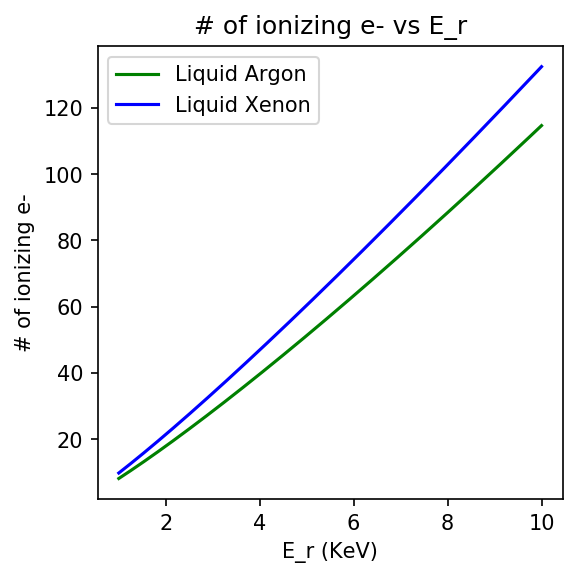

In [34]:
plt.figure(figsize=(4,4), dpi=150)

plt.plot(E_r, Q, '-', label='Liquid Argon', color='green')
plt.plot(E_r, Q_X, '-', label='Liquid Xenon', color='blue')
#plt.yscale('log')
plt.legend(loc='upper left')
plt.title('# of ionizing e- vs E_r')
plt.ylabel('# of ionizing e-')
plt.xlabel('E_r (KeV)')
plt.show()

In [ ]:
# Blargon

In [ ]:
# Q1: Plot the scintillation and charge yields detectable in a TPC as a function of E field 
#     between 0 and 6 kV/cm for alpha particles and muons, in units of (gamma or e-)s^-1

In [28]:
E_field = np.arange(0, 6, 0.001)  # V/cm

In [29]:
# alpha particles
f_0 = 0.8
x = 0.5   #kV/cm 

Reco_Frac = f_0 * np.exp(-E_field/x)

In [30]:
# Scintillation
Scint_alpha =  (2/3 + Reco_Frac)*(20000)

# Charge
Charge = (1 - Reco_Frac)*(20000)

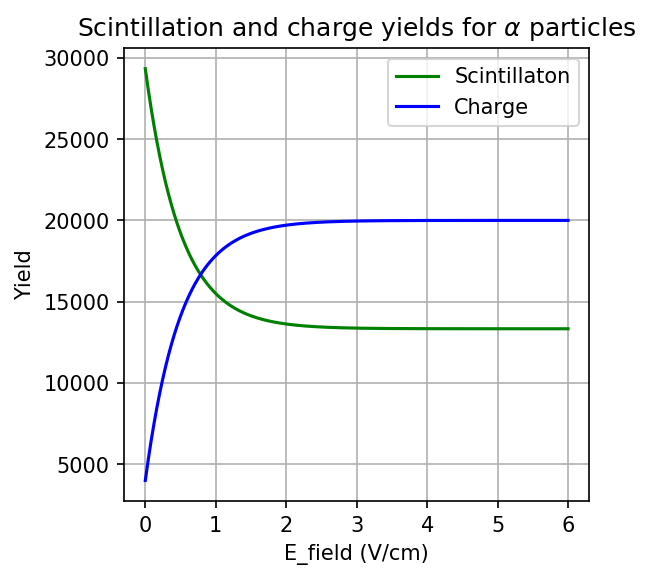

In [31]:
plt.figure(figsize=(4,4), dpi=150)

plt.plot(E_field, Scint_alpha, '-', label='Scintillaton', color='green')
plt.plot(E_field, Charge, '-', label='Charge', color='blue')

plt.grid(True)
plt.legend(loc='upper right')
plt.title(r'Scintillation and charge yields for $\alpha$ particles')
plt.ylabel('Yield')
plt.xlabel('E_field (V/cm)')
plt.show()

In [32]:
# muons particles
f_0 = 0.3
x = 0.5   #kV/cm 

Reco_Frac = f_0 * np.exp(-E_field/x)

In [33]:
# Scintillation
Scint_alpha =  (2/3 + Reco_Frac)*(20000)

# Charge
Charge = (1 - Reco_Frac)*(20000)

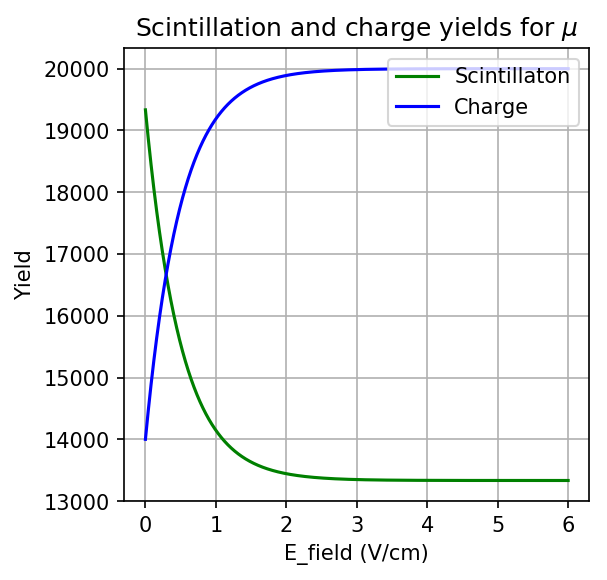

In [34]:
plt.figure(figsize=(4,4), dpi=150)

plt.plot(E_field, Scint_alpha, '-', label='Scintillaton', color='green')
plt.plot(E_field, Charge, '-', label='Charge', color='blue')

plt.grid(True)
plt.legend(loc='upper right')
plt.title(r'Scintillation and charge yields for $\mu$')
plt.ylabel('Yield')
plt.xlabel('E_field (V/cm)')
plt.show()

In [ ]:
# Q2: On a log scale, plot the average scintillation pulse shapes at E field of 0, 500 V/cm and 6 kV/cm
#     for 5.3 MeV alpha particles. Use an appropriate absolute normalization on the y scale

In [224]:
# From Lectures 11 and 12:
# ~Emission time of photons from these two luminescent processes generally have exponential distributions:

Time = np.arange(0, 10, 0.0001)
Triplet = 2     # microseconds
Singlet = 0.01  # microseconds

P_t_T = (1/Triplet) * np.exp(- Time/Triplet) 
P_t_S = (1/Singlet) * np.exp(- Time/Singlet)

In [225]:
# 0 E-field

# alpha particles
f_0 = 0.8
x = 0.5      #kV/cm
E_field = 0  # V/cm

Reco_Frac = f_0 * np.exp(-E_field/x)

# Scintillation
Scint_alpha =  (2/3 + Reco_Frac)*(20000*5.3)

L_R = (0.5)*(Scint_alpha)*(P_t_T) + (0.5)*(Scint_alpha)*(P_t_S)
L_Ex = (0.7)*(Scint_alpha)*(P_t_T) + (0.3)*(Scint_alpha)*(P_t_S)

Ratio = (L_Ex + L_R)    #L_R + L_Ex      #(L_Ex + L_R) / L_Ex 
norm = Ratio/max(Ratio)




# 500 E-field
E_field_500 = 500  # V/cm

Reco_Frac_500 = f_0 * np.exp(-E_field/x)

# Scintillation
Scint_alpha_500 =  (2/3 + Reco_Frac_500)*(20000*5.3)

L_R_5 = (0.5)*(Scint_alpha_500)*(P_t_T) + (0.5)*(Scint_alpha_500)*(P_t_S)
L_Ex_5 = (0.7)*(Scint_alpha_500)*(P_t_T) + (0.3)*(Scint_alpha_500)*(P_t_S)

Ratio_5 = (L_Ex_5 + L_R_5)  #L_Ex_5 + L_R_5      #(L_Ex_5 + L_R_5) / L_Ex_5 
norm_5 = Ratio_5/max(Ratio_5)




# 500 E-field
E_field_6 = 6000  # V/cm

Reco_Frac_6 = f_0 * np.exp(-E_field/x)

# Scintillation
Scint_alpha_6 =  (2/3 + Reco_Frac_6)*(20000*5.3)

L_R_6 = (0.5)*(Scint_alpha_6)*(P_t_T) + (0.5)*(Scint_alpha_6)*(P_t_S)
L_Ex_6 = (0.7)*(Scint_alpha_6)*(P_t_T) + (0.3)*(Scint_alpha_6)*(P_t_S)

Ratio_6 = (L_Ex_6 + L_R_6)  #L_Ex_6 + L_R_6      #(L_Ex_5 + L_R_5) / L_Ex_5 
norm_6 = Ratio_6/max(Ratio_6)

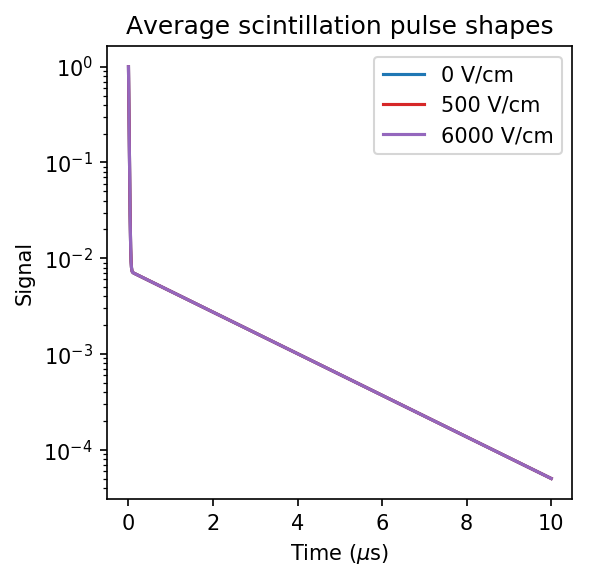

In [226]:
plt.figure(figsize=(4,4), dpi=150)

plt.plot(Time, norm, '-', label='0 V/cm', color='tab:blue')
plt.plot(Time, norm_5, '-', label='500 V/cm', color='tab:red')
plt.plot(Time, norm_6, '-', label='6000 V/cm', color='tab:purple')

#plt.grid(True)
plt.yscale('log')
plt.legend(loc='upper right')
plt.title('Average scintillation pulse shapes')
plt.ylabel('Signal')
plt.xlabel(r'Time ($\mu$s)')
plt.show()

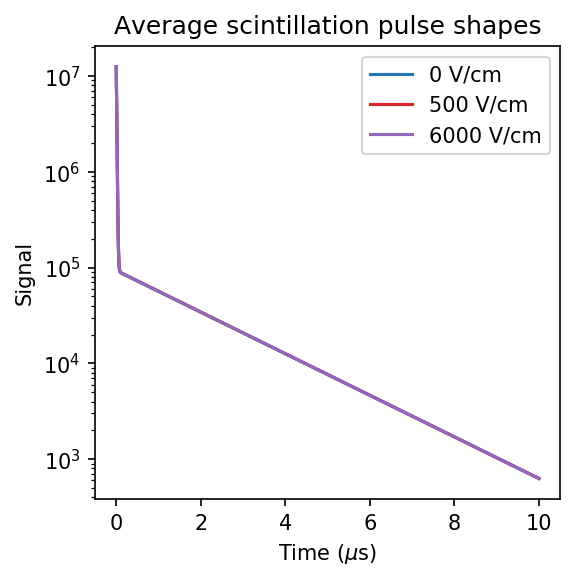

In [227]:
plt.figure(figsize=(4,4), dpi=150)

plt.plot(Time, Ratio, '-', label='0 V/cm', color='tab:blue')
plt.plot(Time, Ratio_5, '-', label='500 V/cm', color='tab:red')
plt.plot(Time, Ratio_6, '-', label='6000 V/cm', color='tab:purple')

#plt.grid(True)
plt.semilogy()
plt.legend(loc='upper right')
plt.title('Average scintillation pulse shapes')
plt.ylabel('Signal')
plt.xlabel(r'Time ($\mu$s)')
plt.show()

In [172]:
# Lecture 16 Problem: The Spherical Time Projection Chamber

# The NEWS-G experiment is a dark matter detector based on a spherical time projection chamber. In this
# system, electrons are drifted in 10 bar argon gas to a central electrode which is biased relative to 
# the outer spherical shell at high voltage V. For the moment we imagine a simplified scenario where 
# the detector is operated without gas gain.

In [ ]:
# Q2: Calculate the pulse shape for i) electrons and ii) ions drifting from a charge deposit 
#     as position r, as recorded on the central electrode. Plot this function for r = R_c / 2

In [254]:
Time = np.arange(0,100, 0.1)  # microseconds

V_0 = 100
R_a = 0.3  #cm
R_c = 70   #cm
e = 1

In [255]:
# electrons
mu_e = 0.03 #0.16

# ions
mu_ions = 0.03/1000

In [256]:
Pulse_e = e*(V_0/((1/R_a)-(1/R_c)))*((3*mu_e*V_0/((1/R_a)-(1/R_c))*Time+(R_a)**(3))**(-1/3)-(1/R_c))
Pulse_ions = e*(V_0/((1/R_a)-(1/R_c)))*((3*mu_ions*V_0/((1/R_a)-(1/R_c))*Time+(R_a)**(3))**(-1/3)-(1/R_c))

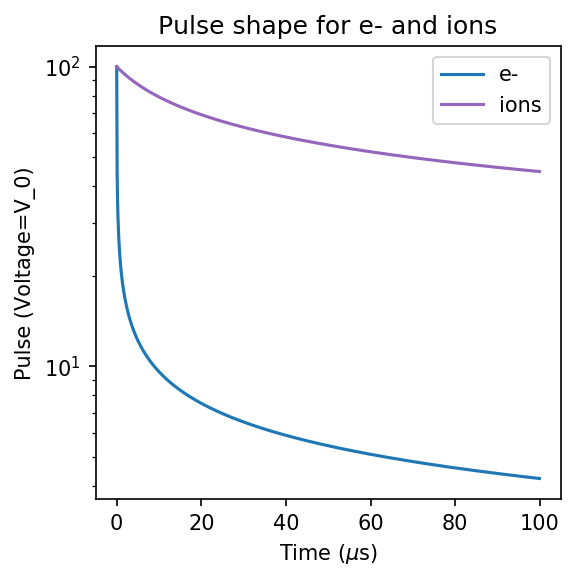

In [260]:
plt.figure(figsize=(4,4), dpi=150)

plt.plot(Time, Pulse_e, '-', label='e-', color='tab:blue')
plt.plot(Time, Pulse_ions, '-', label='ions', color='tab:purple')

#plt.grid(True)
plt.semilogy()
plt.legend(loc='upper right')
plt.title(r'Pulse shape for e- and ions')
plt.ylabel('Pulse (Voltage=V_0)')
plt.xlabel(r'Time ($\mu$s)')
plt.show()